In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/car-sales/Car_sales.csv") #import dataset

In [3]:
df #melihat df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
df.isna().sum() #melihat datapoint yang kosong

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

dipilih atribut yang sekiranya cocok untuk regresi sederhana dan berganda

In [5]:
new_df = df[['Price_in_thousands', 'Horsepower', 'Engine_size', 'Power_perf_factor']] #membuat df yang baru

In [6]:
new_df #melihat df baru

,Price_in_thousands,Horsepower,Engine_size,Power_perf_factor
0,21.50,140.0,1.8,58.280150
1,28.40,225.0,3.2,91.370778
2,NaN,225.0,3.2,NaN
3,42.00,210.0,3.5,91.389779
4,23.99,150.0,1.8,62.777639
...,...,...,...,...
152,24.40,160.0,1.9,66.498812
153,27.50,168.0,2.4,70.654495
154,28.80,168.0,2.4,71.155978
155,45.50,236.0,2.3,101.623357


In [7]:
new_df.isna().sum() #melihat datapoint yang kosong

Price_in_thousands    2
Horsepower            1
Engine_size           1
Power_perf_factor     2
dtype: int64

bersihkan kolom yang tak bernilai dengan .dropna()

In [8]:
cleaned_df = new_df.dropna(subset=['Price_in_thousands', 'Engine_size', 'Horsepower', 'Power_perf_factor']) #membuat df baru dengan menghapus datapoint yang kosong

In [9]:
cleaned_df.isna().sum() #melihat apakah masih ada yang kosong

Price_in_thousands    0
Horsepower            0
Engine_size           0
Power_perf_factor     0
dtype: int64

<Axes: title={'center': 'Engine_size Vs Price in Thousands'}, xlabel='Engine_size', ylabel='Price_in_thousands'>

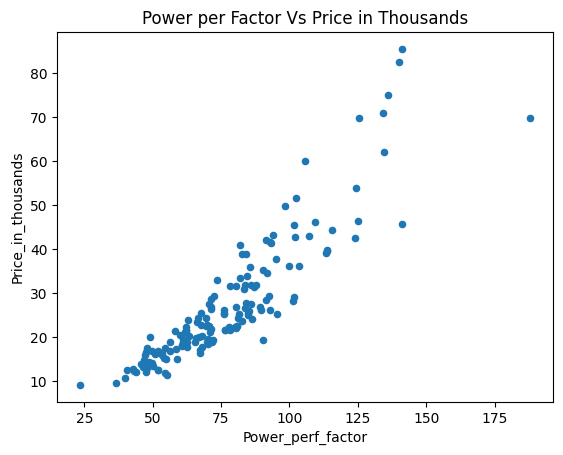

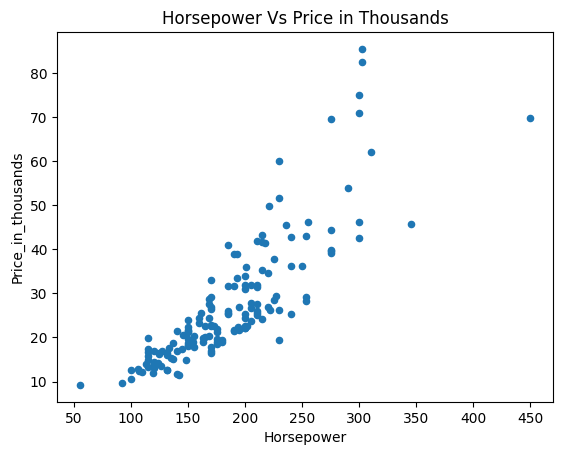

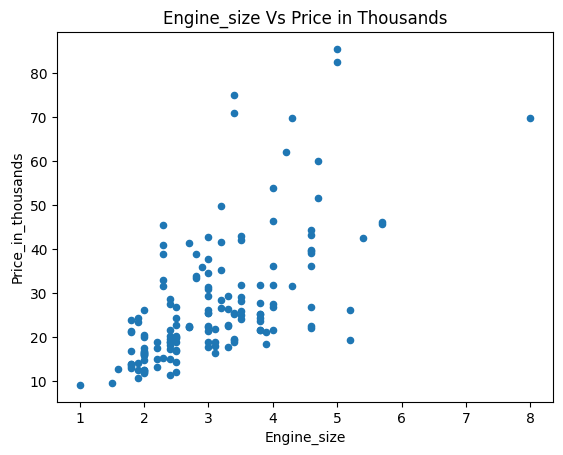

In [10]:
#plot untuk masing-masing atribut
cleaned_df.plot(x='Power_perf_factor', y='Price_in_thousands', kind='scatter', title='Power per Factor Vs Price in Thousands')
cleaned_df.plot(x='Horsepower', y='Price_in_thousands', kind='scatter', title='Horsepower Vs Price in Thousands')
cleaned_df.plot(x='Engine_size', y='Price_in_thousands', kind='scatter', title='Engine_size Vs Price in Thousands')

terlihat sekilas bahwa masing-masing atribut memiliki korelasi positif dengan atribut target.

# Akan dibuat regresi sederhana dengan variabel X adalah power per factor dan Y adalah price in thousands

In [11]:
#memilih variabel dependent dan independent
X = cleaned_df.drop(columns=["Price_in_thousands"])
y = cleaned_df[["Price_in_thousands"]]

In [12]:
#mem-split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
x1_train = X_train[["Power_perf_factor"]]
x1_test = X_test[["Power_perf_factor"]]

# Membuat Model

In [14]:
linreg1 = LinearRegression()

In [15]:
linreg1.fit(x1_train, y_train)

LinearRegression()

In [16]:
#nilai b0
linreg1.intercept_

array([-11.13368419])

In [17]:
#nilai b1
linreg1.coef_

array([[0.49889823]])

In [18]:
linreg1_b0 = linreg1.intercept_[0]
linreg1_b1 = linreg1.coef_[0][0]

# Rumus regresi yang didapat:

In [19]:
print("y =", linreg1_b0, "+", linreg1_b1, "x")

y = -11.133684194945523 + 0.4988982313502056 x


# Melihat seberapa akurat model yang dibuat

In [20]:
y_pred1 = linreg1.predict(x1_test)

In [21]:
y_pred1

array([[22.56397524],
       [40.01784468],
       [39.41931473],
       [28.79003913],
       [29.52289275],
       [ 7.16205322],
       [58.7032345 ],
       [12.78691001],
       [39.56602898],
       [32.37572998],
       [35.19107465],
       [16.45394947],
       [20.01850038],
       [35.74175437],
       [45.62390908],
       [22.44938192],
       [15.59039818],
       [27.92043399],
       [23.98363123],
       [17.05208542],
       [11.99690786],
       [30.90074971],
       [24.37861597],
       [12.96192103],
       [36.23505571],
       [16.21578127],
       [29.7006218 ],
       [27.03661266],
       [19.91772508],
       [14.30900189],
       [26.79407985]])

# Solusi Eksak: Least Square

In [22]:
def least_squares_sederhana(x, y):
    n = len(y)
    x = np.array(x)
    y = np.array(y)
    
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x2 = sum(x**2)
    sum_xy = sum(x*y)
    
    atas = n*(sum_xy) - (sum_x)*(sum_y)
    bawah = n * sum_x2 - (sum_x)**2
    beta1 = atas/bawah

    mean_x = sum_x / n
    mean_y = sum_y / n

    beta0 = mean_y - beta1 * mean_x

    return (beta0[0], beta1[0])

In [23]:
linreg2_betas = least_squares_sederhana(x1_train, y_train)

In [24]:
linreg2_betas

(-11.133684194945651, 0.4988982313502072)

In [25]:
linreg2_beta0, linreg2_beta1 = linreg2_betas

In [26]:
y_pred2 = np.array(linreg2_beta0 + linreg2_beta1 * x1_test)

In [27]:
y_pred2

array([[22.56397524],
       [40.01784468],
       [39.41931473],
       [28.79003913],
       [29.52289275],
       [ 7.16205322],
       [58.7032345 ],
       [12.78691001],
       [39.56602898],
       [32.37572998],
       [35.19107465],
       [16.45394947],
       [20.01850038],
       [35.74175437],
       [45.62390908],
       [22.44938192],
       [15.59039818],
       [27.92043399],
       [23.98363123],
       [17.05208542],
       [11.99690786],
       [30.90074971],
       [24.37861597],
       [12.96192103],
       [36.23505571],
       [16.21578127],
       [29.7006218 ],
       [27.03661266],
       [19.91772508],
       [14.30900189],
       [26.79407985]])

# Matriks Evaluasi

In [28]:
mean_absolute_error(y_test, y_pred1)

4.791126833312753

In [29]:
mean_squared_error(y_test, y_pred1)

45.62352851207211

In [30]:
r2_score(y_test, y_pred1)

0.7877631139377748

# Regresi Berganda

Untuk regresi berganda, akan digunakan 3 parameter bebas saja untuk memprediksi price in thousands alasannya karena 3 variabel yang saya pilih "kelihatan" punya korelasi positif dengan variabel yang ditargetkan, dan terlebih lagi lebih memudahkan untuk bekerja dengan 3 parameter bebas.

# Membuat Model

In [31]:
linreg4 = LinearRegression()

In [32]:
linreg4.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred4 = linreg4.predict(X_test)

In [34]:
y_pred4

array([[25.45000001],
       [51.72800009],
       [28.34000006],
       [22.24499999],
       [25.30999999],
       [ 9.699     ],
       [82.60000004],
       [17.50000001],
       [45.49999989],
       [31.505     ],
       [26.31000001],
       [11.52800001],
       [19.047     ],
       [43.33000001],
       [39.66500006],
       [16.535     ],
       [16.48000001],
       [31.75      ],
       [19.72      ],
       [16.87499999],
       [13.26      ],
       [27.88499999],
       [21.97500001],
       [13.96      ],
       [37.80499999],
       [15.00999999],
       [40.99999999],
       [21.56      ],
       [19.03500001],
       [16.24      ],
       [26.09999999]])

In [35]:
y_test

,Price_in_thousands
83,25.450
144,51.728
32,28.340
30,22.245
120,25.310
62,9.699
95,82.600
149,17.500
155,45.500
70,31.505


In [36]:
linreg4.intercept_

array([1.36768676e-08])

In [37]:
linreg4.coef_

array([[-0.91689127, -0.67542433,  2.59231561]])

In [38]:
linreg2_b0 = linreg4.intercept_[0]
linreg2_b1 = linreg4.coef_[0][0]
linreg2_b2 = linreg4.coef_[0][1]
linreg2_b3 = linreg4.coef_[0][2]

# Didapat persamaan regresi berganda

In [39]:
print("y =", linreg2_b0, "+", linreg2_b1, "x1", "+", linreg2_b2, "x2", "+", linreg2_b3, "x3")

y = 1.3676867638423573e-08 + -0.9168912665235149 x1 + -0.675424332733761 x2 + 2.5923156053730865 x3


# Akurasi model

In [40]:
print("Hasil regresi linier berganda")
print("MAE:", mean_absolute_error(y_test, y_pred4))
print("MSE", mean_squared_error(y_test, y_pred4))
print("R^2:", r2_score(y_test, y_pred4))

Hasil regresi linier berganda
MAE: 1.7110680356462315e-08
MSE 9.984985280613217e-16
R^2: 1.0


# EDA untuk K-Means

In [41]:
df_kmeans_fill_median = df.copy()

In [42]:
df_kmeans_fill_median.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [43]:
year_resale_median = df['__year_resale_value'].median()
df_kmeans_fill_median["__year_resale_value"] = df_kmeans_fill_median["__year_resale_value"].fillna(year_resale_median)


In [44]:
df_kmeans_fill_median.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

karena baris yang nan tinggal sedikit, maka saya memilih untuk menghapus saja

In [45]:
df_kmeans_cleaned = df_kmeans_fill_median.dropna()

In [46]:
df_kmeans_cleaned.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [47]:
df_kmeans_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         152 non-null    object 
 1   Model                152 non-null    object 
 2   Sales_in_thousands   152 non-null    float64
 3   __year_resale_value  152 non-null    float64
 4   Vehicle_type         152 non-null    object 
 5   Price_in_thousands   152 non-null    float64
 6   Engine_size          152 non-null    float64
 7   Horsepower           152 non-null    float64
 8   Wheelbase            152 non-null    float64
 9   Width                152 non-null    float64
 10  Length               152 non-null    float64
 11  Curb_weight          152 non-null    float64
 12  Fuel_capacity        152 non-null    float64
 13  Fuel_efficiency      152 non-null    float64
 14  Latest_Launch        152 non-null    object 
 15  Power_perf_factor    152 non-null    float64


In [48]:
#buat semua data menjadi numerik
df_fin = df_kmeans_cleaned.drop(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], axis = 1)
df_fin.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [49]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 0 to 156
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_in_thousands   152 non-null    float64
 1   __year_resale_value  152 non-null    float64
 2   Price_in_thousands   152 non-null    float64
 3   Engine_size          152 non-null    float64
 4   Horsepower           152 non-null    float64
 5   Wheelbase            152 non-null    float64
 6   Width                152 non-null    float64
 7   Length               152 non-null    float64
 8   Curb_weight          152 non-null    float64
 9   Fuel_capacity        152 non-null    float64
 10  Fuel_efficiency      152 non-null    float64
 11  Power_perf_factor    152 non-null    float64
dtypes: float64(12)
memory usage: 15.4 KB


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
Xk = df_fin.values[:,1:]
Xk = np.nan_to_num(Xk)
Clus_dataSet= StandardScaler().fit_transform(Xk)
Clus_dataSet

array([[-0.07642353, -0.40580037, -1.19398947, ..., -1.21265887,
         0.96906987, -0.73408212],
       [ 0.26592209,  0.07432786,  0.14398293, ..., -0.19344876,
         0.26986756,  0.5843739 ],
       [ 1.22526898,  1.02066756,  0.43069131, ...,  0.01039326,
        -0.42933475,  0.585131  ],
       ...,
       [-0.28874599,  0.10216138, -0.62057273, ..., -0.01508699,
         0.26986756, -0.22106034],
       [-0.28874599,  1.26421087, -0.71614219, ...,  0.13779452,
        -0.19626732,  0.99287552],
       [-0.28874599,  0.60316475, -0.14272544, ...,  0.8002811 ,
         0.03680012,  0.35984924]])

# Akan dilakukan metode k-means

In [52]:
#modelling
clusterNum = 3
k_means_car = KMeans(init = 'k-means++', n_clusters= clusterNum, n_init = "auto") 
#3 cluster, dengan running algoritma sebanyak 12 kali

k_means_car.fit(Xk)

#hasil clustering
labels_cust = k_means_car.labels_
print(labels_cust)

[1 2 2 1 2 0 2 2 2 2 2 2 2 0 0 2 0 1 2 2 2 2 0 1 1 2 1 2 2 1 0 0 1 1 2 0 2
 2 2 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 1 1 2 2 1 1 1 2 2 1 2 2 2 2 0 0 2 2 0 2
 0 1 1 1 2 1 2 2 1 1 1 2 2 2 2 2 0 0 2 2 2 0 2 1 1 2 2 2 2 2 1 1 0 2 2 1 1
 1 0 1 2 2 2 2 2 2 0 0 2 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2]


In [53]:
print(k_means_car.inertia_)

174648.58384468232


In [54]:
#menambahkan kolom hasil clustering pada dataset
df_fin['Clus_km'] = labels_cust
df_fin.head(5)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clus_km
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,2
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,2
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,1
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,2


# Evaluasi Model

In [55]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

mencari nilai k terbaik

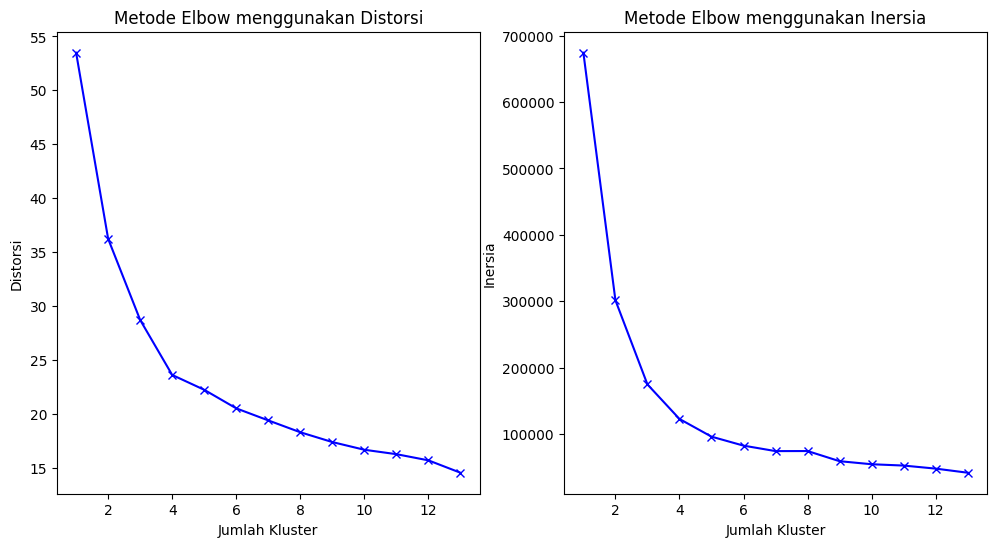

In [56]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 14)

# Looping untuk setiap jumlah kluster
for k in K:
    # Inisialisasi dan fit model
    kmeanModel = KMeans(init='k-means++', n_clusters=k, n_init='auto')
    kmeanModel.fit(Xk)
    
    # Hitung distorsi
    distortion = sum(np.min(cdist(Xk, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Xk.shape[0]
    distortions.append(distortion)
    mapping1[k] = distortion
    
    # Hitung inersia
    inertia = kmeanModel.inertia_
    inertias.append(inertia)
    mapping2[k] = inertia

# Plotting hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Distorsi')
plt.title('Metode Elbow menggunakan Distorsi')

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow menggunakan Inersia')

plt.show()


 # Dengan melihat plot menggunakan metode elbow metode inersia, akan dipilih 8 sebagai nilai K

In [57]:
#modelling
clusterNum = 8
k8_means_car = KMeans(init = 'k-means++', n_clusters= clusterNum, n_init = 12) 
#3 cluster, dengan running algoritma sebanyak 12 kali

k8_means_car.fit(Xk)

#hasil clustering
labels_cust8 = k8_means_car.labels_
print(labels_cust8)

[5 6 4 5 4 3 0 4 4 0 6 4 4 3 3 4 6 2 0 0 0 4 7 2 2 0 0 0 4 5 6 6 5 0 0 1 6
 0 0 5 6 5 2 0 0 5 2 4 4 5 6 5 4 2 5 5 4 4 2 5 5 6 6 2 0 4 4 6 3 3 6 6 3 4
 3 2 5 5 4 0 4 0 5 5 5 4 4 0 0 6 3 7 0 0 4 3 4 2 5 4 0 0 0 0 5 5 6 0 0 5 5
 5 6 5 0 4 4 4 0 6 7 7 0 0 2 2 2 5 5 0 0 2 5 4 5 5 4 2 5 6 2 2 5 2 2 2 0 0
 0 0 6 4]


In [58]:
print(k8_means_car.inertia_) #menampilkan inertia score

62311.36771706455


In [59]:
#menambahkan kolom hasil clustering pada dataset
df_fin['Clus_km'] = labels_cust8
df_fin.head(5)

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Clus_km
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,5
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,6
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,4
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,5
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,4


In [60]:
df_fin.to_csv("./Car_Sales_Clusters.csv") #men-download dataset berisi label